### Refresher on calculus

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

Let's create a quadratic function to apply on an arrat and plot its corresponding parabola

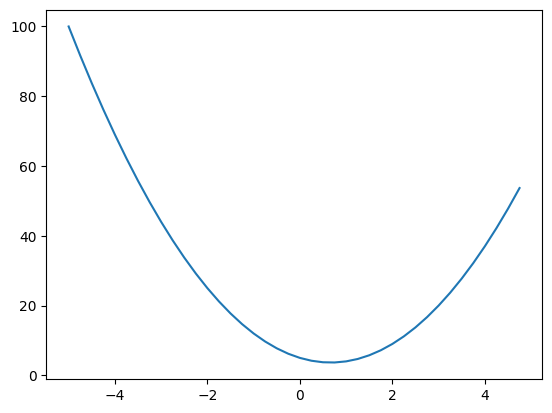

In [7]:
def f(x):
    return 3*x**2 - 4*x + 5

xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

Let's now evaluate the derivative of this function numerically.<br>
The "intensity' of the slope of the derivated function measures the sensitivity with which the function response to a tiny change in its value.

In [ ]:
# we set the tiny change h very small
h  = 0.001
# and set a point x at 3.0 where f(x) grows wrt x
x = 3.0
# then compute the derivative at x
(f(x+h) - f(x)) / h

14.00300000000243

The derivative of f(x) at x is the slope of the line that passes through (x,f(x)) and (x+h,f(x+h)).<br>
Read it as the sensitivity of f(x) to x.<br>
Where f(x) increases wrt x, the slope will be positive.

In [14]:
# or at -3.0 where f(x) decreases wrt x
x = -3.0
(f(x+h) - f(x)) / h

-21.996999999998934

While where f(x) decreases wrt x, the slope will be negative.<br>
And where f(x) stabilizes wrt x, the slope will approach 0:

In [15]:
x = 2/3
(f(x+h) - f(x)) / h

0.0029999999995311555

More precisely if we want to measure a function sensitivity wrt to a variable we can:

In [20]:
# set inputs
a = 2.0
b = -3.0
c = 10.0

# create function d
d1 = a*b+c
# bump a by h
a += h
# create function corresponding to a bump by h
d2 = a*b+c

# print the slope
print('d1 =', d1)
print('d2 =', d2)
print('slope =', (d2-d1)/h)

d1 = 4.0
d2 = 3.997
slope = -3.0000000000001137


Slope approx 'b' value as derivating `d = a.b + c` wrt `a` gives `b`.

In [ ]:
# if we bump b by h now
a = 2.0
b += h
d2 = a*b+c
# print the slope
print('d1 =', d1)
print('d2 =', d2)
print('slope =', (d2-d1)/h)

d1 = 4.0
d2 = 4.002
slope = 1.9999999999997797


Approxing 'a' value as derivating `d = a.b + c` wrt `b` gives `a`.

### Start to create the main class Value

In [47]:
class Value:

    # takes single value that it wraps and keeps track of
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        # set for optimization in showing the children of the value for operations
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # allows to print the value
    def __repr__(self):
        return f"Value(data={self.data})"

    # allows to add two values together
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    # allows to multiply two values together
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

In [55]:
# instantiate intial values
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
# compute some more
d = a * b + c; d.label = "d"

In [49]:
print('d =', d)
print('d._prev =', d._prev)
print('d._op =', d._op)
print('d.label =', d.label)

d = Value(data=4.0)
d._prev = {Value(data=10.0), Value(data=-6.0)}
d._op = +
d.label = d


Add vizualisation tool

In [50]:
from graphviz import Digraph


def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(
            name=uid,
            label="{ %s | data %.4f}" % (n.label, n.data),
            # label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


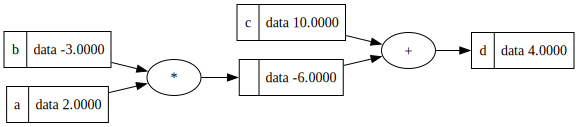

In [51]:
draw_dot(d)

In [52]:
# deepen the graph with new values
e = a * b; e.label = "e"
f = e + c; f.label = "f"
g = Value(-2.0, label="g")
L = f * g; L.label = "L"

In [53]:
print(e.label,'=', e)
print(f.label,'=', f)
print(g.label,'=', g)
print(L.label,'=', L)

e = Value(data=-6.0)
f = Value(data=4.0)
g = Value(data=-2.0)
L = Value(data=-8.0)


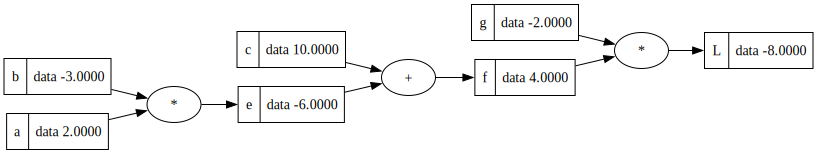

In [54]:
draw_dot(L)